# plotting bayescan results

### plotting imports

In [28]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%run CONFIG.ipynb

In [18]:
WORKING_DIR = os.path.join()

### plot formatting

In [2]:
sns.set(font_scale=1.2)
sns.set_style("white")
%matplotlib inline

### plotting of outliers

In [32]:
def plot_bayescan(baye_fst, q_threshold = .05):
    figsize(16, 8)
    plt.scatter(-np.log10(baye_fst['qval']), baye_fst['fst'])
    plt.axvline(x=-np.log10(q_threshold), c= 'black',  ls = '--')
    plt.xlabel('-log10(q)',fontsize = 24); plt.ylabel("Fst",fontsize = 24)
    plt.annotate('{} outliers at\nqval <= {}'.format(sum(baye_fst['qval'] < q_threshold), q_threshold),  
             xycoords='axes fraction', xy = (.1, .7), fontsize = 24)
    sns.despine()
    plt.show()

#### Load data

In [4]:
def load_baye_fst(filename):
    baye_fst = pd.read_csv(filename, sep = " ", skiprows=1, header = None, skipinitialspace=True)
    baye_fst.columns = ['BSname','prob','log10(PO)','qval','alpha','fst', 'junk']
    return(baye_fst)

In [ ]:
non_paralogs_fst_file = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/bayescan/non_paralogs.baye_fst.txt'
group1_fst_file = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/bayescan/BS_group_1.baye_fst.txt'
group2_fst_file = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/bayescan/BS_group_2.baye_fst.txt'
group3_fst_file = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/bayescan/BS_group_3.baye_fst.txt'
group4_fst_file = '/home/ipseg/Desktop/waples/chum_populations/results/batch_4/pop_analysis/bayescan/BS_group_4.baye_fst.txt'

Here, I am trying to use relative file paths that will work across Ubuntu and Windows

In [23]:
non_paralogs_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'non_paralogs.baye_fst.txt')
group1_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_1.baye_fst.txt')
group2_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_2.baye_fst.txt')
group3_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_3.baye_fst.txt')
group4_fst_file = os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'bayescan', 'BS_group_4.baye_fst.txt')

In [25]:
BS_non_paralogs = load_baye_fst(non_paralogs_fst_file)
BS_group1 = load_baye_fst(group1_fst_file)
BS_group2 = load_baye_fst(group2_fst_file)
BS_group3 = load_baye_fst(group3_fst_file)
BS_group4 = load_baye_fst(group4_fst_file)

BS_group4.head()

,BSname,prob,log10(PO),qval,alpha,fst,junk
0,1,0.080016,-1.06060,0.907775,-0.013294,0.009456,NaN
1,2,0.089618,-1.00680,0.901760,0.016222,0.009944,NaN
2,3,0.088418,-1.01330,0.903290,-0.009706,0.009483,NaN
3,4,0.100220,-0.95318,0.868530,-0.005109,0.009613,NaN
4,5,0.110420,-0.90613,0.820340,0.040033,0.010596,NaN


### Plot

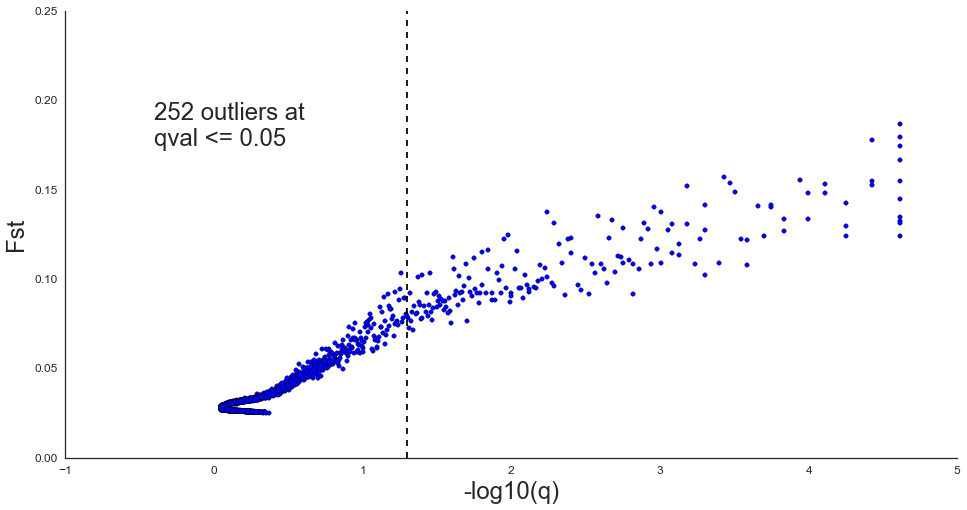

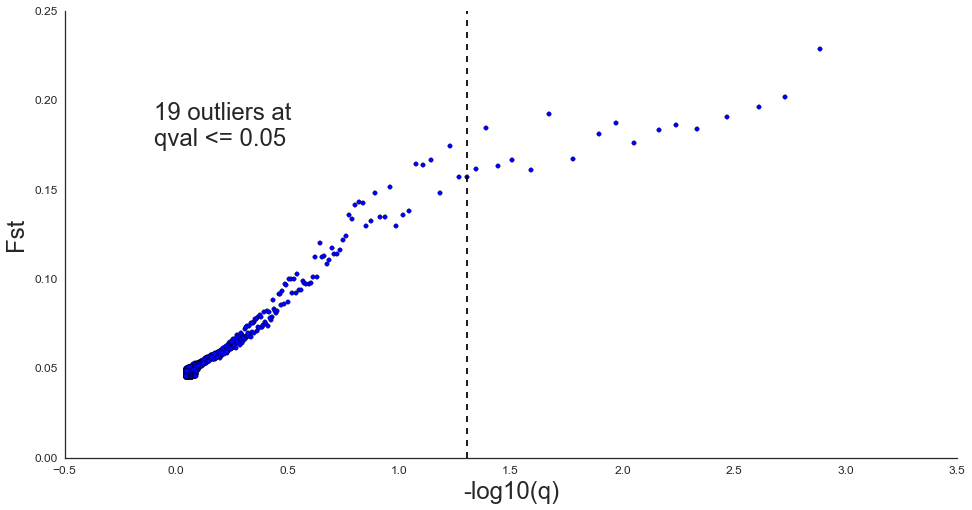

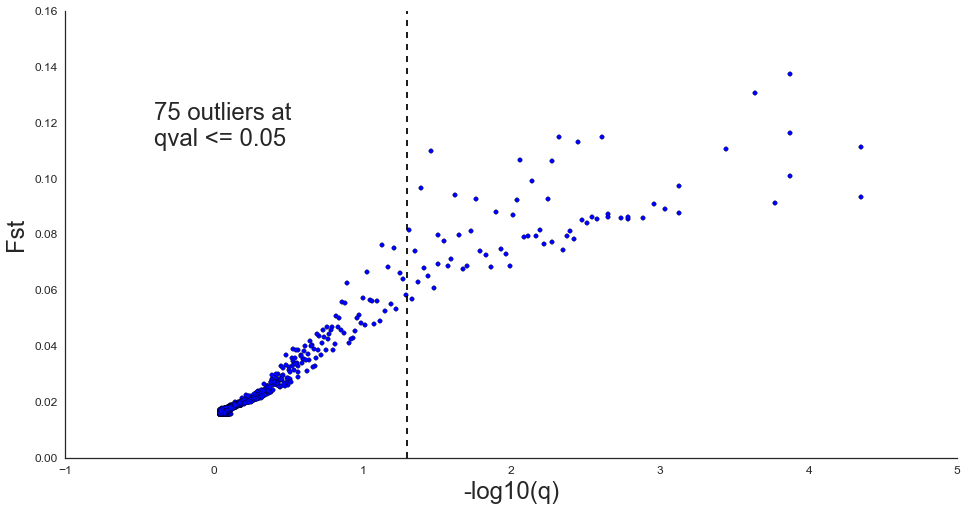

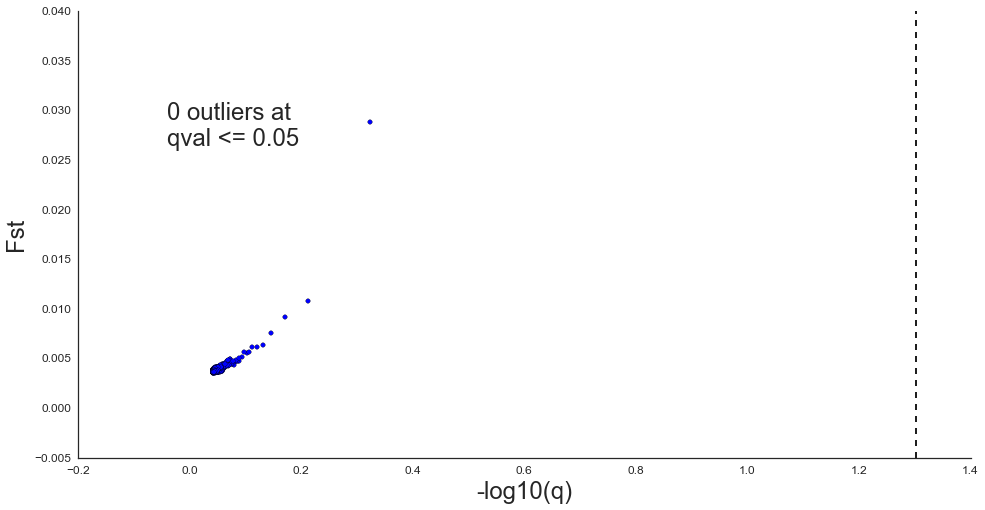

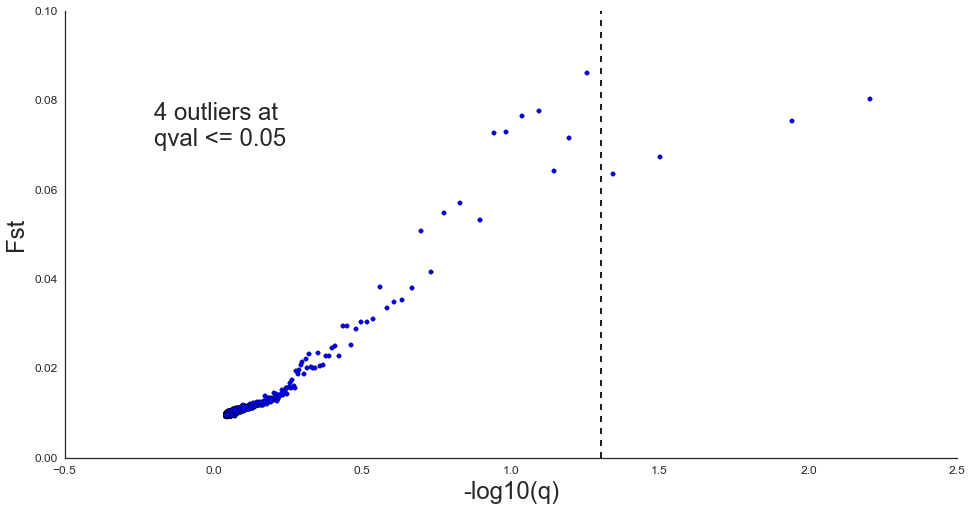

In [34]:
figsize(8, 4)
plot_bayescan(BS_non_paralogs, .05)
plot_bayescan(BS_group1, .05)
plot_bayescan(BS_group2, .05)
plot_bayescan(BS_group3, .05)
plot_bayescan(BS_group4, .05)

### Define sets of outliers

In [35]:
### This need to be changed to export Stacks_SNP IDs
def get_outliers(baye_fst, q_threshold = .05):
    outliers = baye_fst[baye_fst['qval'] <= q_threshold]
    return(set(outliers['BSname']))

In [36]:
outliers_all = get_outliers(BS_non_paralogs, .05)
outliers_1 = get_outliers(BS_group1, .05)
outliers_2 = get_outliers(BS_group2, .05)
outliers_3 = get_outliers(BS_group3, .05)
outliers_4 = get_outliers(BS_group4, .05)

In [37]:
across_life_history_outliers = outliers_1.union(outliers_2)
within_life_history_outliers = outliers_3.union(outliers_4)
life_history_outliers = across_life_history_outliers.difference(within_life_history_outliers)

In [39]:
len(life_history_outliers)

90

# Combine with mapped data

### get the Stacks_SNP id for each locus

In [41]:
# in the output from plink, column 2 is what we want
stacks_SNPs = pd.read_csv(os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'non_paralogs.map'),
            header = None, sep = '\t')
stacks_SNPs.columns =  ['ignore1', 'stacks_SNP', 'ignore2', 'ignore3']
stacks_SNPs['BSname'] = stacks_SNPs.index + 1
stacks_SNPs.head()

,ignore1,stacks_SNP,ignore2,ignore3,BSname
0,0,1013_6,0,6,1
1,0,2062_6,0,6,2
2,0,2574_6,0,6,3
3,0,2741_6,0,6,4
4,0,4096_6,0,6,5


#### Load plink data on the map postions and Fst of loci

In [43]:
map_pop_fst = pd.read_csv(os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'map_pop_fst.txt'),
                          sep = "\t")
map_pop_fst.head()

,stacks_SNP,contig,ignore,pos,match,LEP_LG,LEPname,cM,resolved_locus,CHR,POS,NMISS,FST
0,8315_6,c19441,0,6,19441,1,1606,4.55,19441,1,6,168,0.023536
1,36304_6,c52547,0,6,52547,1,6416,106.38,52547,1,6,163,0.075677
2,41478_6,c58618,0,6,58618,1,7821,5.39,58618,1,6,162,0.046751
3,6516_7,c17379,0,7,17379,1,1286,82.96,17379,1,7,147,0.084434
4,41929_7,c59150,0,7,59150,1,7951,5.39,59150,1,7,166,0.005174


#### load bayescan 'baye_fst' file

In [45]:
mapped_bayescan = pd.merge(BS_non_paralogs, stacks_SNPs)
mapped_bayescan = mapped_bayescan[['stacks_SNP', 'BSname', 'fst', 'log10(PO)', 'qval']]

In [46]:
map_pop_bayescan = pd.merge(map_pop_fst, mapped_bayescan, on="stacks_SNP")
# clarify the two different fst columns
map_pop_bayescan.rename(columns={'fst': 'Fst_bayescan', 'FST': 'Fst_plink'}, inplace=True)

#### write out

In [47]:
map_pop_bayescan.to_csv(os.path.join(CWD, 'results', 'batch_4', 'pop_analysis', 'map_pop_bayescan.txt'), 
                       sep = "\t", index = False)
map_pop_bayescan.head()

,stacks_SNP,contig,ignore,pos,match,LEP_LG,LEPname,cM,resolved_locus,CHR,POS,NMISS,Fst_plink,BSname,Fst_bayescan,log10(PO),qval
0,8315_6,c19441,0,6,19441,1,1606,4.55,19441,1,6,168,0.023536,6160,0.027898,-1.16940,0.88768
1,36304_6,c52547,0,6,52547,1,6416,106.38,52547,1,6,163,0.075677,6161,0.031529,-0.85623,0.61134
2,41478_6,c58618,0,6,58618,1,7821,5.39,58618,1,6,162,0.046751,6162,0.028469,-1.12870,0.88272
3,6516_7,c17379,0,7,17379,1,1286,82.96,17379,1,7,147,0.084434,6163,0.050675,-0.20878,0.20170
4,41929_7,c59150,0,7,59150,1,7951,5.39,59150,1,7,166,0.005174,6164,0.027188,-1.05120,0.84973


#### Combine with population allele frequencies

In [48]:
frq = pd.read_csv(os.path.join(CWD, 'data', 'batch_4', 'pop_genotypes', 'non_paralogs.frq.strat'), 
                  header = None, skipinitialspace = True, sep = " ", skiprows = 1)
frq.columns = [ 'CHR', 'stacks_SNP', 'CLUSTER', 'A1', 'A2', 'MAF', 'MAC', 'NCHROBS', 'junk']
POPINFO = pd.read_csv(os.path.join(CWD, 'data', 'POPINFO.txt'), sep = '\t')
frq = pd.merge(frq, POPINFO)
frq.head()

,CHR,stacks_SNP,CLUSTER,A1,A2,MAF,MAC,NCHROBS,junk,SILLI,POPNAME,YEAR,TIMING,REGION
0,0,1013_6,1,A,T,0.1111,4,36,NaN,CMHAMM10,Hamma Hamma,2010,Summer,Hood Canal
1,0,2062_6,1,C,G,0.1750,7,40,NaN,CMHAMM10,Hamma Hamma,2010,Summer,Hood Canal
2,0,2574_6,1,A,G,0.2895,11,38,NaN,CMHAMM10,Hamma Hamma,2010,Summer,Hood Canal
3,0,2741_6,1,T,C,0.1250,5,40,NaN,CMHAMM10,Hamma Hamma,2010,Summer,Hood Canal
4,0,4096_6,1,G,T,0.1316,5,38,NaN,CMHAMM10,Hamma Hamma,2010,Summer,Hood Canal


#### Apply qval threshold

In [68]:
qval_threshold = .10
outliers = map_pop_bayescan[map_pop_bayescan['qval']  < qval_threshold]
pop_outliers = pd.merge(outliers, frq, on = 'stacks_SNP') # one line for each locus within each pop
pop_outliers.sort(columns = ['LEP_LG', 'cM'], inplace= True)
pop_outliers.head()

,stacks_SNP,contig,ignore,pos,match,LEP_LG,LEPname,cM,resolved_locus,CHR_x,...,A2,MAF,MAC,NCHROBS,junk,SILLI,POPNAME,YEAR,TIMING,REGION
10,23631_32,c37517,0,32,37517,1,3770,106.8,37517,1,...,G,0.7632,29,38,NaN,CMHAMM10,Hamma Hamma,2010,Summer,Hood Canal
11,23631_32,c37517,0,32,37517,1,3770,106.8,37517,1,...,G,0.4412,15,34,NaN,CMKALA03,Nisqually Kalama Creek,2003,Winter,South Puget Sound
12,23631_32,c37517,0,32,37517,1,3770,106.8,37517,1,...,G,0.3421,13,38,NaN,CMLILLIW11,Lilliwaup Creek,2011,Fall,Hood Canal
13,23631_32,c37517,0,32,37517,1,3770,106.8,37517,1,...,G,0.3226,20,62,NaN,CMSHERW94F,Sherwood River Fall,1994,Fall,South Puget Sound
14,23631_32,c37517,0,32,37517,1,3770,106.8,37517,1,...,G,0.4310,25,58,NaN,CMSHERW94S,Sherwood River Summer,1994,Summer,South Puget Sound


#### Convert to a rectangle

In [69]:
pop_outliers_rect = pop_outliers.pivot('stacks_SNP', 'POPNAME', 'MAF')

# just a subset of the data
pop_outliers_LG2 = pop_outliers[pop_outliers['LEP_LG']==2]
pop_outliers_LG2 = pop_outliers_LG2[pop_outliers_LG2['cM']>100]
pop_outliers_LG2_rect= pop_outliers_LG2.pivot('stacks_SNP', 'POPNAME', 'MAF')

### set up coloration for run timing

In [59]:
timing_colors = {
    'Hamma Hamma': sns.xkcd_palette(["red"])[0], #summer
    'Sherwood River Summer': sns.xkcd_palette(["red"])[0], #summer
    'Hoodsport Hatchery': sns.xkcd_palette(["brown"])[0],
    'Lilliwaup Creek': sns.xkcd_palette(["brown"])[0],
    'Snohomish River': sns.xkcd_palette(["brown"])[0],
    'Stillaguamish River': sns.xkcd_palette(["brown"])[0],
    'Sherwood River Fall': sns.xkcd_palette(["brown"])[0],
    'Skookum Creek': sns.xkcd_palette(["brown"])[0],
    'Nisqually Kalama Creek': sns.xkcd_palette(["blue"])[0], # winter
    'Squakum Creek': sns.xkcd_palette(["black"])[0]
}
col_colors = pd.Series(pop_outliers_rect.columns).map(timing_colors)

## UPGMA tree

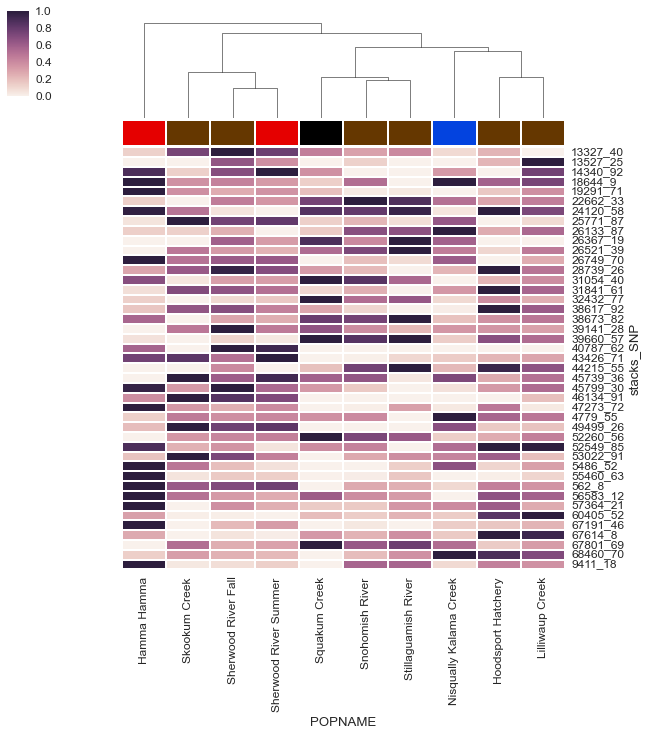

In [61]:
sns.clustermap(pop_outliers_rect, col_colors=col_colors, standard_scale=0, row_cluster=False)
plt.show()

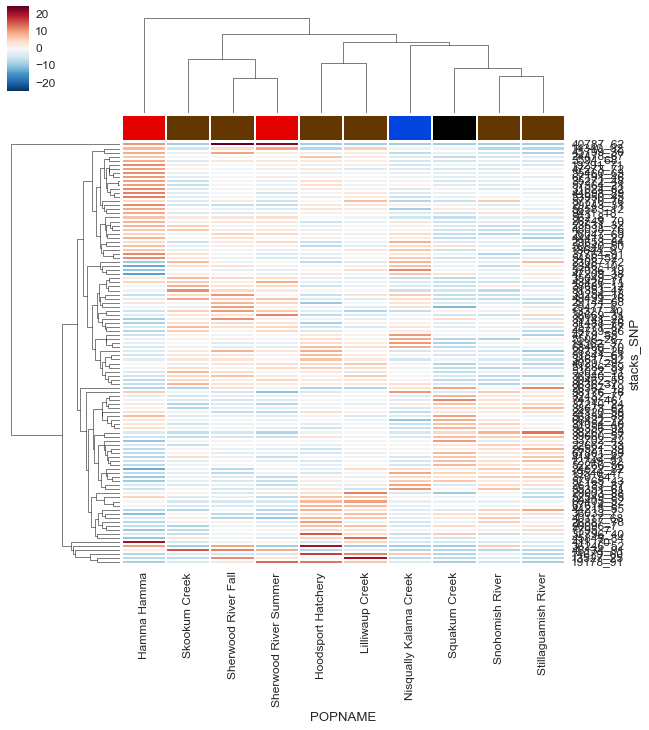

In [70]:
sns.clustermap(pop_outliers_rect, col_colors=col_colors, z_score=0)
plt.show()

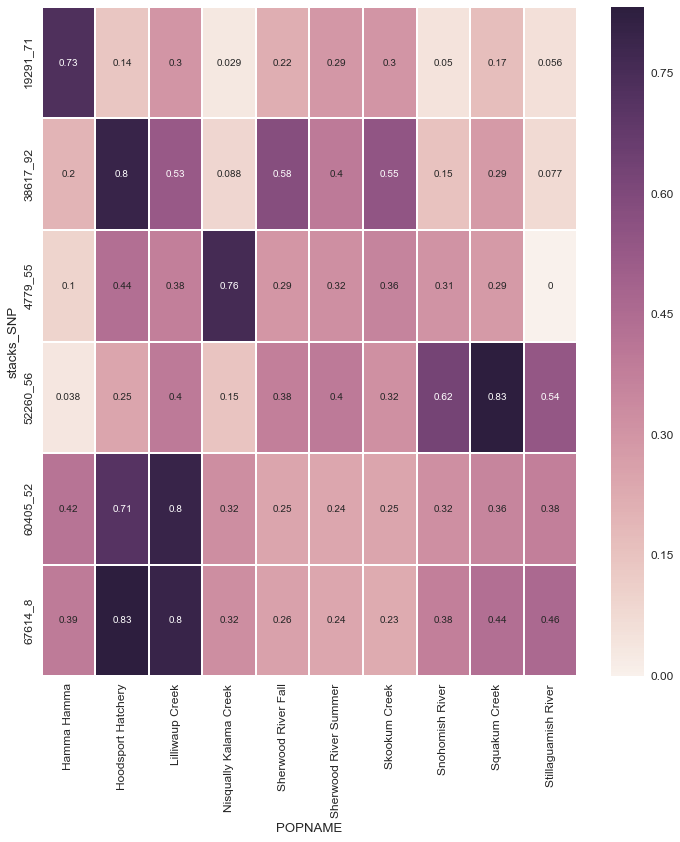

In [67]:
figsize(12,12)
sns.heatmap(pop_outliers_LG2_rect, annot=True)
plt.show()

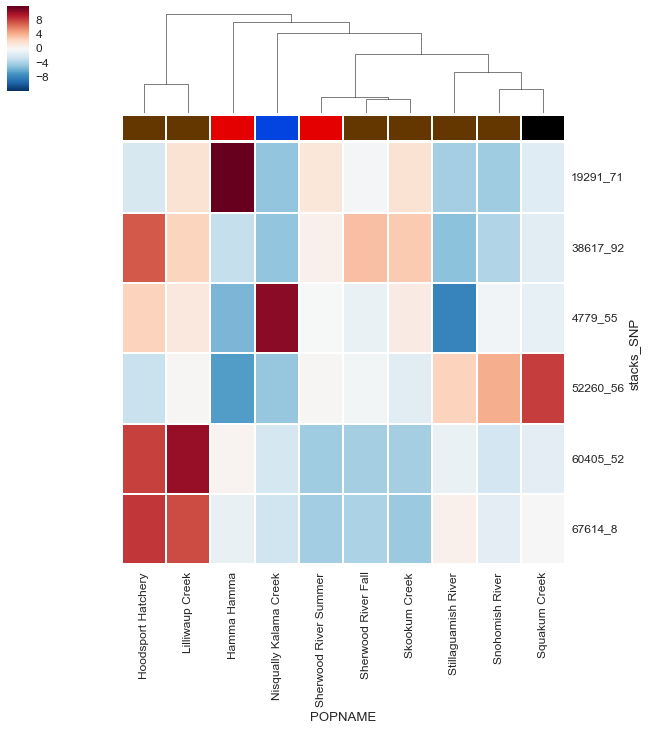

In [66]:
# standard_scale=0 standarizes by column
# z_score=1 standarizes by column
sns.clustermap(pop_outliers_LG2_rect, z_score=0, row_cluster=False, col_colors=col_colors)
plt.show()